In [ ]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.integrate as integrate
from scipy.integrate import quad


We adapt the stochastic differential $$\frac{dV}{dt} = \frac{Ra\tau - V}{\tau_m} + a\sqrt{R}\xi(t)$$ where $$ \xi(t) = \lim_{\Delta \to 0} \frac{\phi_i}{\sqrt{\Delta}} $$ equation used for modelling the voltague using a Gaussian approximation and write it in terms of the variance of its voltage as $$ \tau_0\frac{dV}{dt} = E_0 - V +\sigma_V\sqrt{t\tau_0}\xi(t) $$ using parameters $\tau_0 = 20$, $\mu = 5$ and $\sigma_V = 2$.

Then considerer the refactory state of the neuron such that if the voltage exceeds a value $V_{th}$ which results in a spike, the neuron refactors and the voltage is set to a refactory value $V_{re}$.

Text(0, 0.5, 'Voltage (10mv)')

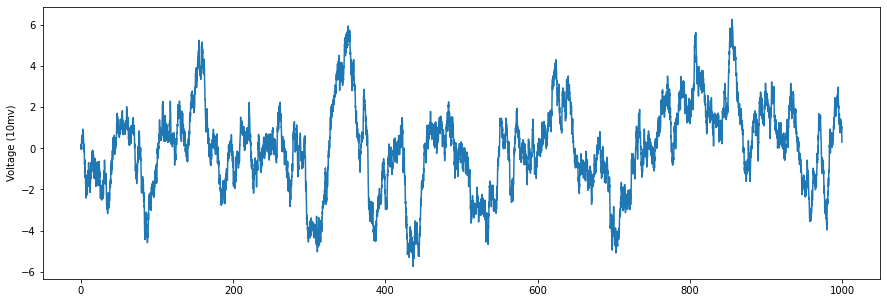

In [ ]:
sim_time = 1000 # 10s runtime
dt = 0.1 # increment step
time = np.arange(0, sim_time, dt)
R = 2/1000 # expected rate of spikes
tau = 20 # closing time constant
mu = 0 # mean voltage
sig = 2 # \sigma
Vth = 10 # threshold voltage
Vre = 0 # reset voltage
V = np.zeros(int(sim_time/dt))
V[0] = 0

for i in range(0, int(sim_time/dt) - 1):
  if(V[i] < Vth):
    V[i+1] = V[i] + (dt/tau)*(mu - V[i]) + np.sqrt(2*dt/tau)*sig*np.random.normal(0, 1)
  else:
    V[i+1] = Vre

figure = plt.figure(figsize = (15, 5))
plt.plot(time, V)
plt.ylabel('Voltage (10mv)')

Code above is rewritten as a method using the expected mean voltage as an imput paramter. This allows the rate of spikes to be calculated as a function of the mean voltage. The data is then plotted, although fitting a curve to the data proved difficult.

For a system of neurons we consider the Fokker-Plack equation $$\tau_0\frac{\partial P}{\partial t} = \sigma_v^2\frac{\partial^2}{\partial V^2} + \frac{\partial}{\partial V}((V-E_0)P)$$ whereby considering $$ \tau_0J = (E_0 -V)P = \sigma_V^2\frac{dP}{dV}$$ we can consider the steady state approximation where $\frac{\partial P}{\partial t} = 0$ allowing us to write $ J = r\theta(V-V_{re})$ for $V \leq V_{th}$ where $x = \frac{V-E_0}{\sigma_V}$ and $P(V)dV = p{x}dx$

Now using the normalisation condition of $p(x)dx$ we can determine the firing rate as $$ r = \frac{1}{\tau_0Z}$$ where $$Z=\int_0^\infty \frac{dz}{z}(e^{x_{th}z}- e^{x_{re}z})e^{-z^2/2}$$

It is important to note that the integral is strictly finitely bigger than zero for all values of $t > 0 $ due to the l'Hopital's limit.

In [ ]:
def rate(mu=2):
  ctr = 0
  for i in range(0, int(sim_time/dt) - 1):
    if (V[i] < Vth):
      V[i+1] = V[i] + (dt/tau)*(mu - V[i]) + np.sqrt(2*dt/tau)*sig*np.random.normal(0, 1)
    else:
      V[i+1] = Vre
      ctr += 1
  return ctr

n = 25
rates = np.zeros(n)
means = np.zeros(n)
xth = np.zeros(n)
xre = np.zeros(n)
t_rates = np.zeros(n)
for i in range(0, n-1):
  means[i] = i+1
  rates[i] = rate(i+1)
  xth[i] = (10 - i + 1)/sig
  xre[i] = (-1)*(i+1)/sig

dv = 0.01
n = int(100/dv)
values = np.linspace(0, 100, n+1)
area = np.zeros([n])

def func(z, xth, xre):
  if z == 0:
    return (xth - xre)
  else:
    return (1/z)*(np.exp(xth*z)-np.exp(xre*z))*np.exp(-(z**2)/2)

def calc_rate(x):
  xth = (Vth-x)/sig
  xre = (Vre-x)/sig
  for i in range (0, n-1):
    area[i] = (1/2)*(values[i+1]-values[i])*(func(values[i+1], xth, xre)+ func(values[i], xth, xre))
  f_value = np.sum(area)
  rate = (1/(tau*f_value))*1000
  return rate

#for our values:

xi = 0
xf = 25
dx = 0.1
n2 = int(xf/dx)

x_values = np.arange(xi, xf, dx)
rates2 = np.zeros([n2])
for i in range(0, n2):
  rates2[i] = calc_rate(x_values[i])



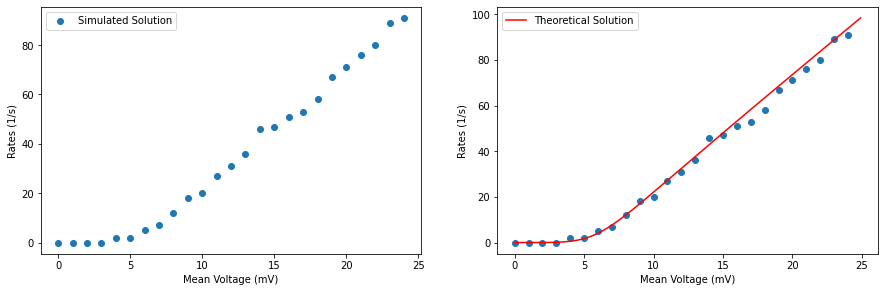

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.xlabel('Mean Voltage (mV)')
plt.ylabel('Rates (1/s)')
plt.scatter(means, rates, label='Simulated Solution')
plt.legend()
plt.subplot(222)
plt.xlabel('Mean Voltage (mV)')
plt.ylabel('Rates (1/s)')
plt.scatter(means, rates)
plt.plot(x_values, rates2, color='r', label='Theoretical Solution')
plt.legend()